/home/sahin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  app.launch_new_instance()


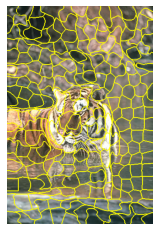

In [13]:
# import the necessary packages
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import argparse
import cv2 as cv

# load the image and convert it to a floating point data type
image =cv.cvtColor(cv.imread("Dataset2/2.jpg"),cv.COLOR_RGB2BGR)


# apply SLIC and extract (approximately) the supplied number
# of segments
segments = slic(image, n_segments = 250, sigma = 5,multichannel=True)

# show the output of SLIC
fig = plt.figure("Superpixels -- %d segments%")
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(image, segments))
plt.axis("off")

# show the plots
plt.show()


In [14]:
from skimage.measure import regionprops
regions = regionprops(segments, intensity_image=image[:,:,1])

In [15]:
def paint_region_with_avg_intensity(rp, mi, channel):
    for i in range(rp.shape[0]):
        image[rp[i][0]][rp[i][1]][channel] = mi
for r in regions:
     paint_region_with_avg_intensity(r.coords, int(r.mean_intensity), 1)

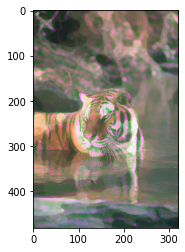

In [16]:
plt.imshow(image)

In [17]:
for i in range(3):
    regions = regionprops(segments, intensity_image=image[:,:,i])
    for r in regions:
        paint_region_with_avg_intensity(r.coords, int(r.mean_intensity), i)

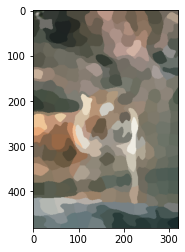

In [18]:
plt.imshow(image)
plt.show()